In [2]:
#import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import cross_validate

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
df = pd.read_csv("./data/cleaned_data_with2.csv",index_col=0)

df.head()

,Price,city,History,Millage,Ratings,Year,Make,Model,Transmission,Age
0,4965000.0,Abia,foreign,149232.0,4.7,2015.0,Honda,Accord,Automatic,5.0
1,1280000.0,Accra,local,145078.0,4.4,2005.0,Toyota,Corolla,Automatic,15.0
2,1280000.0,Accra,local,91691.0,4.6,2008.0,Toyota,Corolla,Automatic,12.0
3,1567500.0,Lagos,local,234797.0,4.5,2004.0,Toyota,Corolla,Automatic,16.0
4,6065000.0,Lagos,foreign,145678.0,4.8,2013.0,Hyundai,Azera,Automatic,7.0


### Data Preparation

In [4]:
df['Price'] = df['Price']/1000000 #reduce the Price values

In [5]:
#drop the Year column
df = df.drop(['Year'],axis=1)

In [6]:
df.shape

(17227, 9)

In [7]:
df[df.Price <= 0]

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
599,0.0,Lagos,foreign,10000.0,2.0,Toyota,RAV 4,Automatic,12.0
606,0.0,Lagos,foreign,9856.0,2.0,Honda,CR-V,Automatic,12.0
617,0.0,Lagos,foreign,0.0,2.0,Ford,Explorer,Automatic,4.0
618,0.0,Rivers,foreign,98000.0,2.0,Honda,CR-V,Automatic,12.0
621,0.0,Lagos,foreign,125425.0,2.0,Toyota,Camry,Automatic,12.0
...,...,...,...,...,...,...,...,...,...
14176,0.0,Lagos,foreign,92134.0,0.0,Mazda,Tribute,Manual,12.0
14177,0.0,Lagos,foreign,21344.0,0.0,Toyota,Corolla,Manual,14.0
14181,0.0,Lagos,foreign,153063.0,0.0,Toyota,Camry,Manual,23.0
14188,0.0,Lagos,foreign,0.0,0.0,Mercedes-Benz,E 350,Manual,7.0


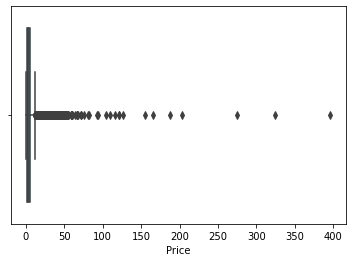

In [8]:
#find outliers!
sns.boxplot(x=df['Price'])

In [9]:
#check for outliers size

df[df.Price > 15]

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
32,30.265,Lagos,foreign,76794.0,4.9,Lexus,LX 570,Automatic,3.0
52,23.115,Lagos,foreign,14464.0,5.0,Lexus,RX 350,Automatic,1.0
53,49.515,Lagos,foreign,14855.0,5.0,Land,Rover Range Rover Velar,Automatic,2.0
61,19.265,Lagos,foreign,19444.0,5.0,Lexus,RX 350,Automatic,4.0
128,55.015,Lagos,foreign,18297.0,4.7,Mercedes-Benz,G 63 AMG,Automatic,4.0
...,...,...,...,...,...,...,...,...,...
17439,36.000,Lagos,foreign,49987.0,3.0,Rover,Range Rover Vogue,Automatic,12.0
17442,29.000,Lagos,foreign,23570.0,2.0,Land,Rover Range Rover Sport,Automatic,12.0
17443,16.000,Lagos,foreign,3931.0,1.0,Toyota,Camry,Automatic,12.0
17457,16.500,Lagos,foreign,89582.0,3.0,Lexus,Lx,Automatic,12.0


In [10]:
#drop all columns where Price is zero and greater than 50(million)
df = df.drop(df[df.Price > 15].index)

df = df.drop(df[df.Price <= 0].index)

In [11]:
df.shape

(13289, 9)

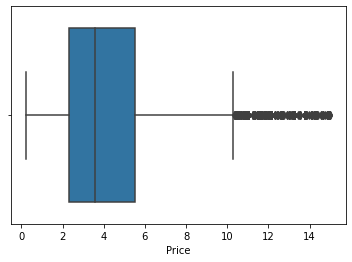

In [12]:
#find outliers!
sns.boxplot(x=df['Price'])

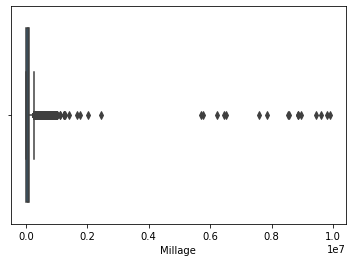

In [13]:
#check out the Millage column
sns.boxplot(x=df['Millage'])

In [14]:
#check for outliers size

df[df.Millage > 200000].shape

(1044, 9)

In [15]:
#drop all columns with Millage more than four hundred thousand km
df = df.drop(df[df.Millage > 200000].index)

In [16]:
df.shape

(12245, 9)

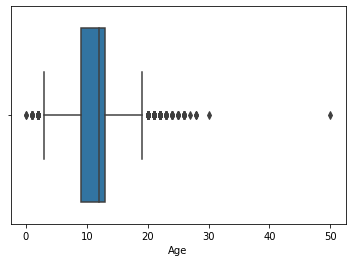

In [17]:
#find outliers in Age!
sns.boxplot(x=df['Age'])

In [18]:
#drop all age greater than 20

df[df.Age > 20].shape

(182, 9)

In [19]:
#drop Age greater than 20

df = df.drop(df[df.Age > 20].index)

In [20]:
df.shape

(12063, 9)

In [21]:
#split the data
X = df.drop(['Price'], axis=1)
y = df['Price']  #target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,shuffle=True)
X_train.describe()

,Millage,Ratings,Age
count,10253.000000,10253.000000,10253.000000
mean,51392.566858,2.371989,11.257973
std,53736.626978,0.940773,3.321836
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,9.000000
50%,47799.000000,2.000000,12.000000
75%,87000.000000,2.000000,13.000000
max,200000.000000,5.000000,20.000000


In [22]:
#to display results
results = X_test

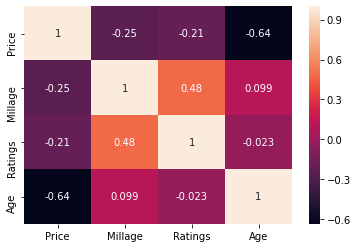

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

norm_cols = ['Millage','Ratings','Age']

# fit scaler on training data
norm = MinMaxScaler().fit(X_train[norm_cols])

# transform training data
X_train.loc[:,norm_cols] = norm.transform(X_train[norm_cols])

# transform testing data
X_test.loc[:,norm_cols] = norm.transform(X_test[norm_cols])

In [25]:
X_train.describe()

,Millage,Ratings,Age
count,10253.000000,10253.000000,10253.000000
mean,0.256963,0.474398,0.562899
std,0.268683,0.188155,0.166092
min,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.450000
50%,0.238995,0.400000,0.600000
75%,0.435000,0.400000,0.650000
max,1.000000,1.000000,1.000000


In [26]:
X_test.shape

(1810, 8)

In [27]:
#One Hot encoding for History and Transmission

ohe = ce.OneHotEncoder(cols=['History','Transmission'])  #instantiate the one-hot encoder

X_train = ohe.fit_transform(X_train)  #fit and transform ohe

X_test = ohe.transform(X_test)

In [28]:
# encodings for city, Make and Model

base_encoder = ce.BaseNEncoder(cols=['city','Make','Model'],base=3)

# fit and transform and you will get the encoded data
X_train = base_encoder.fit_transform(X_train)

X_test = base_encoder.transform(X_test)

In [30]:
X_train.shape

(10253, 24)

### Model Development

##### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

lr = LinearRegression() 
lr_scores = cross_validate(lr, X_train, y_train, cv=5,scoring=('r2', 'neg_mean_absolute_error'),return_train_score=True)

print(lr_scores['test_neg_mean_absolute_error'])

[-1.56719789 -1.46044481 -1.49114646 -1.48575566 -1.55644098]


In [32]:
print(lr_scores['test_r2'])

[0.48955203 0.49635675 0.48674294 0.46977794 0.48667984]


In [33]:
lr.fit(X_train,y_train)
y_test_lr = lr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_lr)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_lr)))

The mean_absolute error is 1.479930776174033
The r2_error is 0.5366499440486596


##### K-Nearest Neigbours

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6) #n_neighbors = 6 is the optimal value according to grid search CV.

knn_scores = cross_validate(knn, X_train, y_train, cv=5,scoring=('r2', 'neg_mean_absolute_error'),return_train_score=True)

print(knn_scores['test_neg_mean_absolute_error'])

[-1.02150878 -0.97209039 -0.98755959 -0.96762646 -1.04544359]


In [35]:
print(knn_scores['test_r2'])

[0.68655829 0.68999547 0.67888794 0.65612004 0.6678087 ]


In [36]:
knn.fit(X_train,y_train)

y_test_knn = knn.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_knn)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_knn)))

The mean_absolute error is 0.9126440732044198
The r2_error is 0.7650801326724268


##### Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor,StackingRegressor

rf = RandomForestRegressor(n_estimators= 1000, max_depth=5, random_state=42,n_jobs=-1,criterion='mse')

rf_scores = cross_validate(rf, X_train, y_train, cv=5,scoring=('r2', 'neg_mean_absolute_error'),return_train_score=True)

print(rf_scores['test_neg_mean_absolute_error'])

[-1.33375424 -1.29758477 -1.28639699 -1.28263742 -1.330932  ]


In [38]:
print(rf_scores['test_r2'])

[0.59503151 0.57402378 0.59047708 0.56330723 0.58903908]


In [39]:
rf.fit(X_train,y_train)

y_test_rf = rf.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_rf)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_rf)))

The mean_absolute error is 1.2429125843318605
The r2_error is 0.654809024684673


##### Gradient Boosted Trees

In [40]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(max_depth=6,objective='reg:squarederror',learning_rate=0.08,
                        n_estimators=800,n_jobs=1) #parameters concluded from gridsearch-cv

xgb_scores = cross_validate(xgbr, X_train, y_train, cv=5,scoring=('r2', 'neg_mean_absolute_error'),return_train_score=True)

print(xgb_scores['test_neg_mean_absolute_error'])

[-0.91166955 -0.89329796 -0.89852604 -0.88566282 -0.90239057]


In [41]:
print(xgb_scores['test_r2'])

[0.76143297 0.75668183 0.74651378 0.73869455 0.76019013]


In [42]:
xgbr.fit(X_train,y_train)

y_test_xgb = xgbr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_xgb)))
print('The r2_score is {}'.format(r2_score(y_test,y_test_xgb)))

The mean_absolute error is 0.8255631099586191
The r2_score is 0.8195434892768741


#### Result Presentation

In [42]:
results.loc[:,'real_price'] = y_test*1000000
results.loc[:,'predicted_price'] = y_test_xgb*1000000
#results[['upper','lower']] = predictions[['upper','lower']]*1000000

# inverse_transform testing data
results.loc[:,norm_cols] = norm.inverse_transform(results[norm_cols])

results.head(20)

,city,History,Millage,Ratings,Make,Model,Transmission,Age,real_price,predicted_price
11446,Lagos,foreign,58963.0,2.0,Toyota,RAV 4,Automatic,7.0,9365000.0,7.566113e+06
14939,Lagos,local,199588.0,4.0,Toyota,Camry,Automatic,12.0,1370000.0,1.635531e+06
9679,Lagos,foreign,83000.0,2.0,Acura,MDX,Automatic,12.0,3645000.0,3.667173e+06
11596,Lagos,foreign,0.0,2.0,Toyota,Camry,Automatic,9.0,4085000.0,3.875879e+06
12358,Lagos,foreign,0.0,2.0,Toyota,Camry,Automatic,20.0,1084500.0,1.159872e+06
16227,Lagos,foreign,97967.0,2.0,Honda,Civic,Automatic,12.0,1850000.0,2.320569e+06
8298,Lagos,foreign,0.0,2.0,Toyota,Camry,Automatic,12.0,2430000.0,3.189440e+06
5117,Lagos,foreign,0.0,2.0,Mercedes-Benz,ML 350,Automatic,10.0,5295000.0,6.099198e+06
15526,Abuja,local,188576.0,3.0,BMW,ALPINA,Automatic,12.0,6910000.0,3.011132e+06
11710,Lagos,foreign,0.0,2.0,Toyota,Camry,Automatic,10.0,4140000.0,3.602679e+06


In [43]:
#next 
#make range predictions

In [50]:
#build a range predictor
from sklearn.ensemble import GradientBoostingRegressor

# Set lower and upper quantile
LOWER_ALPHA = 0.95
UPPER_ALPHA = 0.98


# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",alpha=LOWER_ALPHA,max_depth=6,
                                        criterion='friedman_mse',learning_rate=0.08,n_estimators=800)

# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls",max_depth=6,
                                        criterion='friedman_mse',learning_rate=0.08,n_estimators=800)

upper_model = GradientBoostingRegressor(loss="quantile", alpha=UPPER_ALPHA,max_depth=6,
                                        criterion='friedman_mse',learning_rate=0.08,n_estimators=800)


# Fit models
lower_model.fit(X_train, y_train)
mid_model.fit(X_train, y_train)
upper_model.fit(X_train, y_train)

# Record actual values on test set
predictions = pd.DataFrame(y_test)

# Predict
predictions['lower'] = lower_model.predict(X_test)
predictions['mid'] = mid_model.predict(X_test)
predictions['upper'] = upper_model.predict(X_test)

In [52]:
results[['upper','lower','mid']] = predictions[['upper','lower','mid']]*1000000

results.tail(20)

,city,History,Millage,Ratings,Make,Model,Transmission,Age,real_price,predicted_price,upper,lower,mid
115,Lagos,foreign,100943.0,4.8,Mercedes-Benz,ML 350,Automatic,7.0,12665000.0,1.227197e+07,1.207793e+07,1.206669e+07,1.241497e+07
12342,Lagos,foreign,0.0,2.0,Lexus,ES 300,Automatic,12.0,4305000.0,3.791044e+06,6.345964e+06,4.603749e+06,3.800472e+06
13035,Lagos,foreign,0.0,2.0,Toyota,Sienna,Automatic,17.0,2545000.0,2.356841e+06,3.016813e+06,2.697868e+06,2.338823e+06
4606,Lagos,foreign,0.0,2.0,Nissan,Pathfinder,Automatic,17.0,1912500.0,2.064430e+06,3.087083e+06,2.770339e+06,2.006494e+06
15408,Lagos,local,75012.0,4.0,Mitsubishi,Lancer,Automatic,12.0,1045000.0,2.531847e+06,8.632816e+06,6.287830e+06,2.563705e+06
8208,Lagos,foreign,96257.0,2.0,Toyota,Highlander,Automatic,12.0,4085000.0,4.325291e+06,6.972796e+06,6.371933e+06,4.341298e+06
2614,Lagos,foreign,23541.0,2.0,Lexus,RX 350,Automatic,7.0,9475000.0,9.635435e+06,1.141629e+07,1.134777e+07,9.689620e+06
5352,Ibadan,foreign,0.0,2.0,Toyota,Camry,Automatic,9.0,3535000.0,3.639091e+06,7.820957e+06,4.966660e+06,3.538161e+06
6004,Lagos,foreign,80000.0,2.0,Toyota,Camry,Automatic,13.0,3235000.0,2.846678e+06,5.263356e+06,4.184788e+06,2.955971e+06
15915,Lagos,local,84806.0,3.0,Nissan,Altima,Automatic,12.0,2655000.0,2.067881e+06,7.930363e+06,5.951758e+06,2.447738e+06


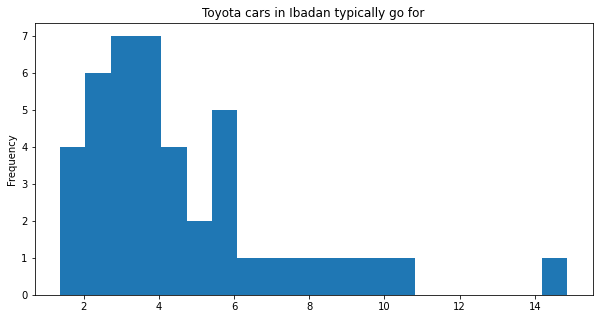

In [83]:
make = 'Toyota'
city = 'Ibadan'
plt.figure(figsize=(10,5))
df[(df.Make == make ) & (df.city == city )].Price.plot.hist(grid=False,bins=20)
plt.title("{} cars in {} typically go for".format(make,city))
plt.show()

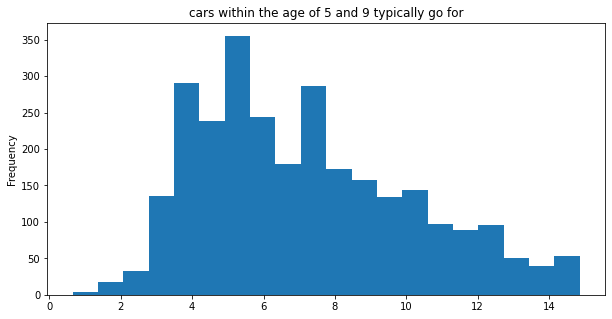

In [84]:
plt.figure(figsize=(10,5))
df[(df.Age >= 5) & (df.Age <= 9)].Price.plot.hist(bins=20)
plt.title("cars within the age of 5 and 9 typically go for")
plt.show()

In [52]:
#fit model on complete dataset
X = pd.concat([X_train,X_test])

y = pd.concat([y_train,y_test])

xgbr.fit(X,y)

XGBRegressor(learning_rate=0.08, max_depth=6, n_estimators=800,
             objective='reg:squarederror')

In [53]:
# save the model to disk
import pickle

filename = 'model.pkl'
pickle.dump(xgbr, open(filename, 'wb'))